In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Proyecto grado/Unificado.csv'

In [ ]:
pip install temporian

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.6/760.6 kB 8.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import temporian as tp
from typing import List
from google.colab import files
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
# Verificar tipos de datos
df.dtypes

,0
Unnamed: 0,int64
Fecha Trafico,object
pm_25,float64
codigo comuna,float64
Velocidad (Km/h),float64
Intensidad,float64
Nº vehiculos long 1,float64
Nº vehiculos long 2,float64
Nº vehiculos long 3,float64
operacion_enc,int64


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
# Convertir la columna 'timestamps' a datetime
df['Fecha Trafico'] = pd.to_datetime(df['Fecha Trafico'], errors='coerce')

# Verifica si hubo conversiones fallidas
print(df['Fecha Trafico'].isnull().sum())  # Esto mostrará cuántas conversiones fallaron

0


In [ ]:
df.head()

,Fecha Trafico,pm_25,codigo comuna,Velocidad (Km/h),Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,Nº vehiculos long 3,operacion_enc,corredor_enc,sentido_enc
0,2021-01-01 00:00:00,23.7741,16.0,14.0,19.0,18.0,1.0,0.0,0,1.0,0.0
1,2021-01-01 01:00:00,28.5095,16.0,14.0,24.0,23.0,1.0,0.0,0,1.0,0.0
2,2021-01-01 02:00:00,27.2400,16.0,14.0,16.0,15.0,1.0,0.0,0,1.0,0.0
3,2021-01-01 03:00:00,37.8129,16.0,14.0,16.0,15.0,1.0,0.0,0,1.0,0.0
4,2021-01-01 04:00:00,34.1848,16.0,16.0,16.0,14.0,2.0,0.0,0,1.0,0.0


In [ ]:
df.dtypes

,0
Fecha Trafico,datetime64[ns]
pm_25,float64
codigo comuna,float64
Velocidad (Km/h),float64
Intensidad,float64
Nº vehiculos long 1,float64
Nº vehiculos long 2,float64
Nº vehiculos long 3,float64
operacion_enc,int64
corredor_enc,float64


In [ ]:
# Obtener el rango de fechas
print(f"Rango de fechas: {df['Fecha Trafico'].min()} - {df['Fecha Trafico'].max()}")

Rango de fechas: 2021-01-01 00:00:00 - 2023-10-31 23:00:00


In [ ]:
# Verificar si hay valores nulos
print(df['Fecha Trafico'].isnull().sum())

0


In [ ]:
# Convertir a tipo 'categoría'
df[['codigo comuna', 'operacion_enc', 'corredor_enc', 'sentido_enc' ]] = df[['codigo comuna', 'operacion_enc', 'corredor_enc', 'sentido_enc']].astype('string')

In [ ]:
df['operacion_enc'].unique()

<StringArray>
['0', '1']
Length: 2, dtype: string

In [ ]:
events = tp.from_pandas(
    df,
    timestamps="Fecha Trafico",
    indexes = ['codigo comuna', 'corredor_enc', 'sentido_enc' ])
events

timestamp,pm_25,Velocidad (Km/h),Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,Nº vehiculos long 3,operacion_enc
2021-01-01 00:00:00+00:00,31.02,17,9,9,0,0,0
2021-01-01 01:00:00+00:00,39.7,19,11,11,0,0,0
2021-01-01 02:00:00+00:00,39.6,20,15,15,0,0,0
…,…,…,…,…,…,…,…
2023-10-31 21:00:00+00:00,13.36,6,75,57,10,0,0
2023-10-31 22:00:00+00:00,16.96,10,98,88,3,0,0
2023-10-31 23:00:00+00:00,16.93,12,97,89,4,0,0
timestamp,pm_25,Velocidad (Km/h),Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,Nº vehiculos long 3,operacion_enc
2021-01-01 00:00:00+00:00,20.27,46,6,5,1,0,1
2021-01-01 01:00:00+00:00,34.55,23,4,4,0,0,1


In [ ]:
# Plot the dataset
events.plot(max_num_plots=4, interactive=True, width_px=600)

The number of plots (28) is larger than "options.max_num_plots=4". Only the first plots will be printed.


# Feature Engineering

In [ ]:
all_features = [
    # Transformar 'pm_25' con prefijo 'f_'
    events["pm_25"].prefix("f_"),

    # Incluir las demás columnas tal como están
    events["Velocidad (Km/h)"],
    events["Intensidad"],
    events["Nº vehiculos long 1"],
    events["Nº vehiculos long 2"],
    events["Nº vehiculos long 3"],
    events["operacion_enc"]
]

In [ ]:
label_list: List[tp.EventSet] = []

# contando las horas desde 00:00 hasta 23:00. me baso en el analisis PACF y ACF para escoger 3 rezagos
horizons = list(range(1, 3))

# For each of the horizons.
for horizon in horizons:
    # Leak the past.
    x = events["pm_25"].leak(tp.duration.hours(horizon))

    # Resample the label to the data.
    x = x.resample(events)

    # Give a name to the label for book-keeping.
    x = x.rename(f"label_horizon_{horizon}_hours")
    label_list.append(x)

labels = tp.glue(*label_list)

The number of plots (8) is larger than "options.max_num_plots=4". Only the first plots will be printed.


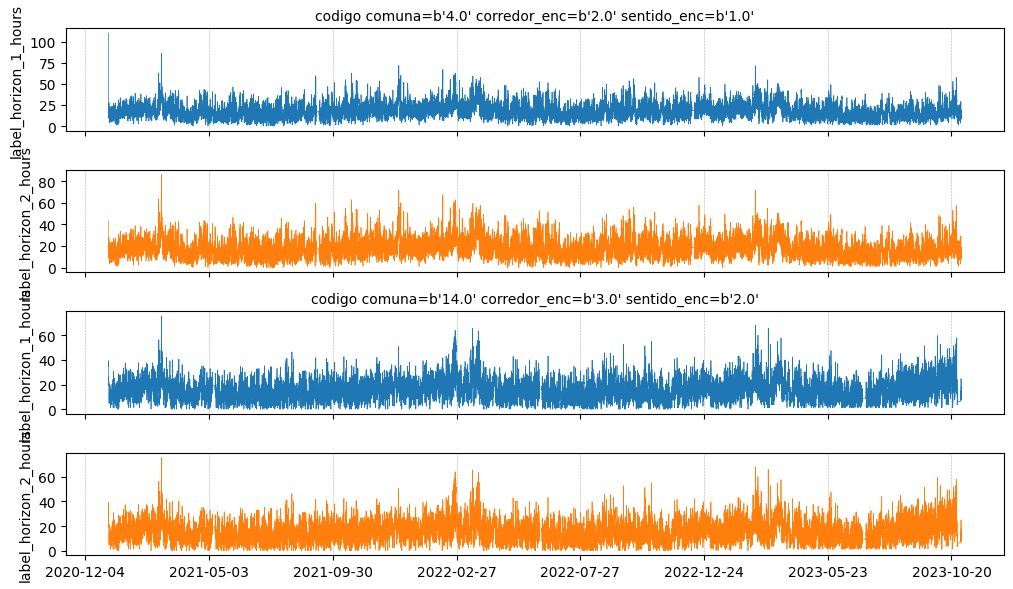

In [ ]:
labels.plot(max_num_plots=4)

# Past observations

In [ ]:
lagged_pm25_list: List[tp.EventSet] = []

for horizon in [1,2,3]: #3 horas
    x = events["pm_25"].lag(tp.duration.days(horizon))
    x = x.resample(events)
    x = x.rename(f"f_pm_25_lag_{horizon}_h")
    lagged_pm25_list.append(x)

feature_lagged_pm_25 = tp.glue(*lagged_pm25_list)

all_features.append(feature_lagged_pm_25)

The number of plots (12) is larger than "options.max_num_plots=4". Only the first plots will be printed.


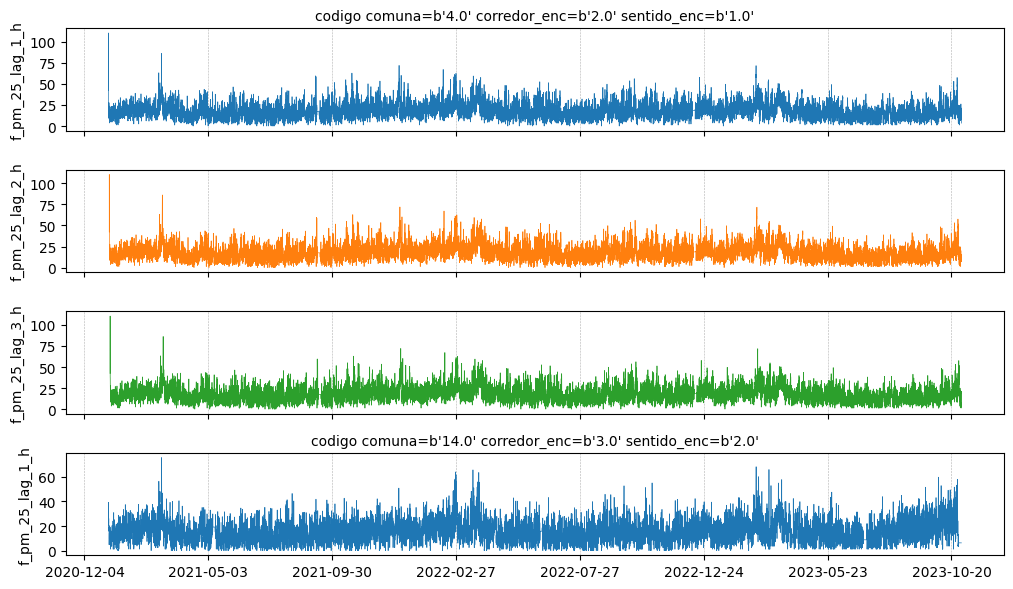

In [ ]:
feature_lagged_pm_25.plot(max_num_plots=4)

# Moving Statistics

Ayudan a identificar tendencias globales (media movil) o periodos de volatidad significativa (desviacion estandar movil)

In [ ]:
moving_stats_list: List[tp.EventSet] = []

pm_25_moving = events["pm_25"].cast(tp.float32)
for win_day in [3]:
    win = tp.duration.days(win_day)

    x = pm_25_moving.simple_moving_average(win).prefix(
        f"f_sma_{win_day}_"
    )
    moving_stats_list.append(x)

    x = pm_25_moving.moving_standard_deviation(win).prefix(
        f"f_sd_{win_day}_"
    )
    moving_stats_list.append(x)

    x = pm_25_moving.moving_sum(win).prefix(f"f_sum_{win_day}_")
    moving_stats_list.append(x)

feature_moving_stats = tp.glue(*moving_stats_list)

all_features.append(feature_moving_stats)

The number of plots (12) is larger than "options.max_num_plots=5". Only the first plots will be printed.


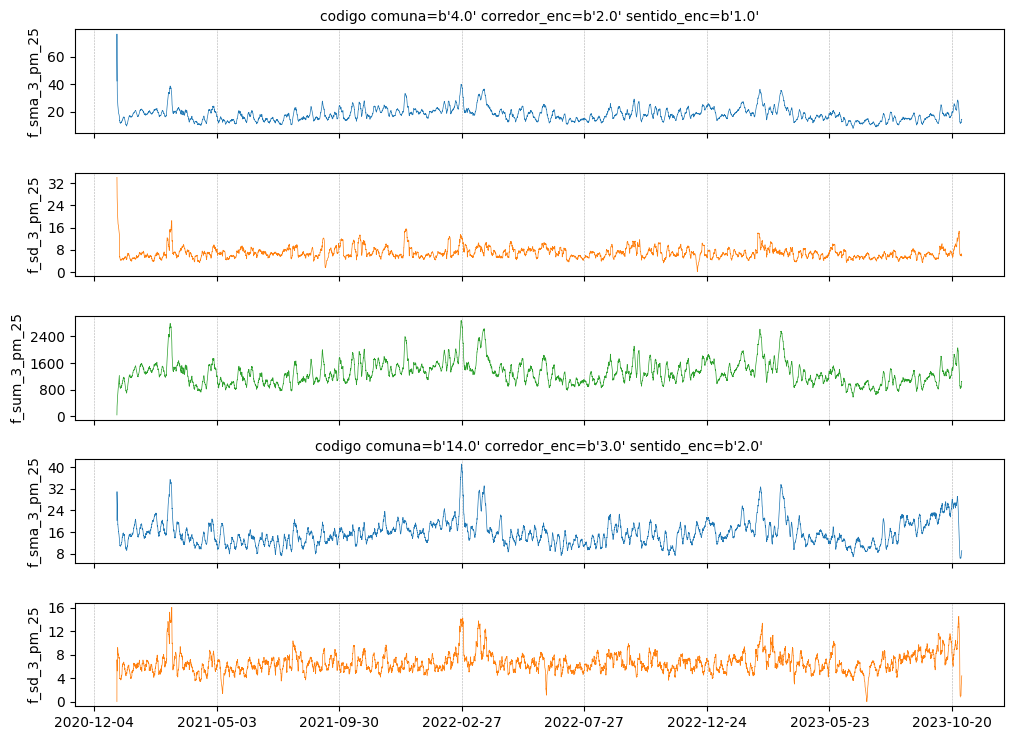

In [ ]:
feature_moving_stats.plot(max_num_plots=5)

In [ ]:
calendar_list: List[tp.EventSet] = []
calendar_list.append(events.calendar_day_of_month())
calendar_list.append(events.calendar_day_of_week())
calendar_list.append(events.calendar_month())
feature_calendar = tp.glue(*calendar_list).prefix("f_")

all_features.append(feature_calendar)

The number of plots (12) is larger than "options.max_num_plots=5". Only the first plots will be printed.


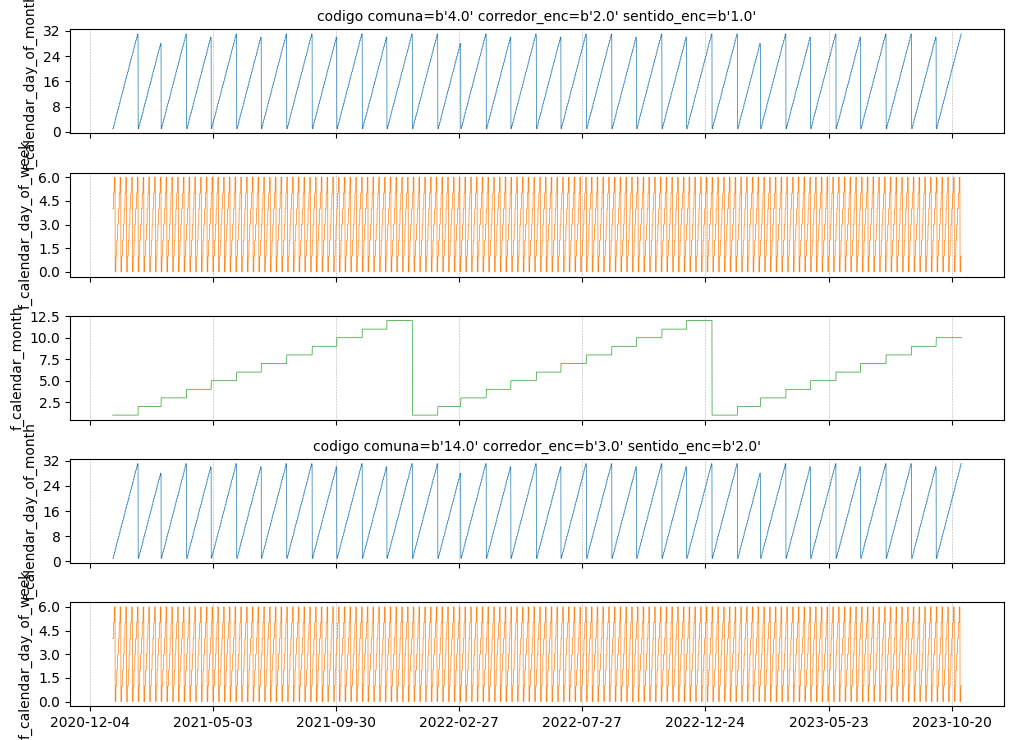

In [ ]:
feature_calendar.plot(max_num_plots=5)

In [ ]:
tabular = tp.glue(*all_features, events["pm_25"], labels)

tabular.schema

features: [('f_pm_25', float64), ('Velocidad (Km/h)', float64), ('Intensidad', float64), ('Nº vehiculos long 1', float64), ('Nº vehiculos long 2', float64), ('Nº vehiculos long 3', float64), ('operacion_enc', str_), ('f_pm_25_lag_1_h', float64), ('f_pm_25_lag_2_h', float64), ('f_pm_25_lag_3_h', float64), ('f_sma_3_pm_25', float32), ('f_sd_3_pm_25', float32), ('f_sum_3_pm_25', float32), ('f_calendar_day_of_month', int32), ('f_calendar_day_of_week', int32), ('f_calendar_month', int32), ('pm_25', float64), ('label_horizon_1_hours', float64), ('label_horizon_2_hours', float64)]
indexes: [('codigo comuna', str_), ('corredor_enc', str_), ('sentido_enc', str_)]
is_unix_timestamp: True

In [ ]:
train_dataset = tp.to_pandas(tabular, timestamp_to_datetime=False)

train_dataset.columns

Index(['codigo comuna', 'corredor_enc', 'sentido_enc', 'f_pm_25',
       'Velocidad (Km/h)', 'Intensidad', 'Nº vehiculos long 1',
       'Nº vehiculos long 2', 'Nº vehiculos long 3', 'operacion_enc',
       'f_pm_25_lag_1_h', 'f_pm_25_lag_2_h', 'f_pm_25_lag_3_h',
       'f_sma_3_pm_25', 'f_sd_3_pm_25', 'f_sum_3_pm_25',
       'f_calendar_day_of_month', 'f_calendar_day_of_week', 'f_calendar_month',
       'pm_25', 'label_horizon_1_hours', 'label_horizon_2_hours', 'timestamp'],
      dtype='object')

In [ ]:
# Define las fechas de corte
train_end_date = pd.to_datetime('2023-05-31')
validation_end_date = pd.to_datetime('2023-08-31')

data = train_dataset.copy()
data['Fecha Trafico'] = df['Fecha Trafico']
# data.dtypes


In [ ]:
# Divide el DataFrame en conjuntos de entrenamiento, validación y prueba
train_df = data[data['Fecha Trafico'] <= train_end_date]
validation_df = data[(data['Fecha Trafico'] > train_end_date) & (df['Fecha Trafico'] <= validation_end_date)]
test_df = data[data['Fecha Trafico'] > validation_end_date]

# Muestra el tamaño de cada conjunto para verificar
print(f"Entrenamiento: {train_df.shape}")
print(f"Validación: {validation_df.shape}")
print(f"Prueba: {test_df.shape}")

Entrenamiento: (84484, 24)
Validación: (8832, 24)
Prueba: (5948, 24)


In [ ]:
train_df.to_csv('/content/drive/MyDrive/Proyecto grado/Train.csv', index=False)
validation_df.to_csv('/content/drive/MyDrive/Proyecto grado/Val.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/Proyecto grado/Test.csv', index=False)
